## This is a machine learning project that targets farmers in making a choice over the kind of crops they need to make based on the soil data inputs.
The model takes input about the state of soil including NPK values and others then predict the 3 best recommended crops that can be planted.
My aim is to enable farmers maximize their outputs and increase crop production.
Below is a structured way to develop the model.

### importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('datasets/Crop_recommendation.csv')

#### Data preprocessing and exploration

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
data.shape

(2200, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
data.duplicated().sum()

0

Data set seems clean, with no duplicated values nor null values  exept the label being an object data type

## Exploring Data

In [11]:
# checking the correlation only for the numerical dtypes
numeric_crop = data.select_dtypes(include=['float64','int64'])
corr = numeric_crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


I will use a correlation matrix to see the carrelation of each column with the other.

<Axes: >

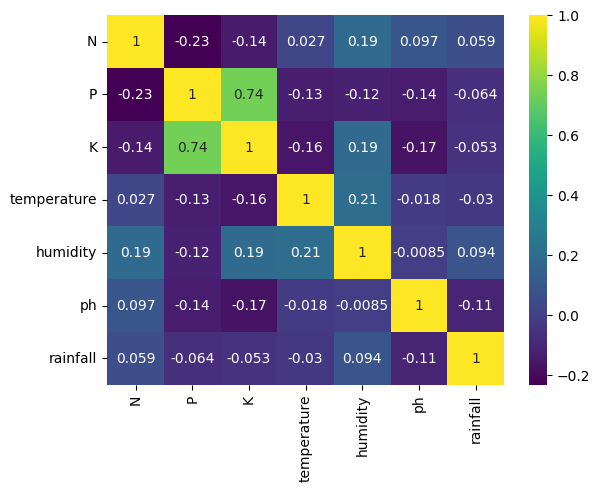

In [12]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='viridis')

P(phosphorus ) and K (potassium) seems to be much correlated  unlike ph and rainfall

In [13]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26356\3179259827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['N'])


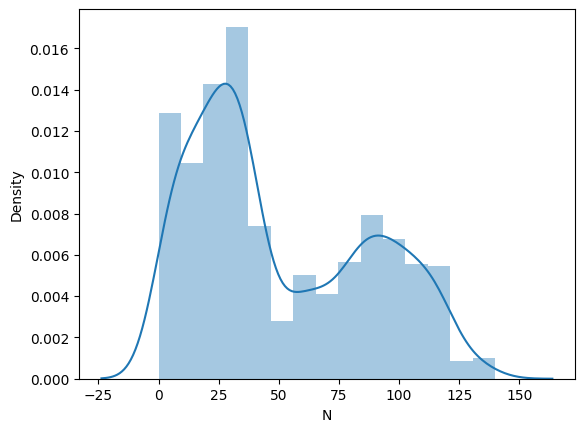

In [14]:
import matplotlib.pyplot as plt
sns.distplot(data['N'])
plt.show()

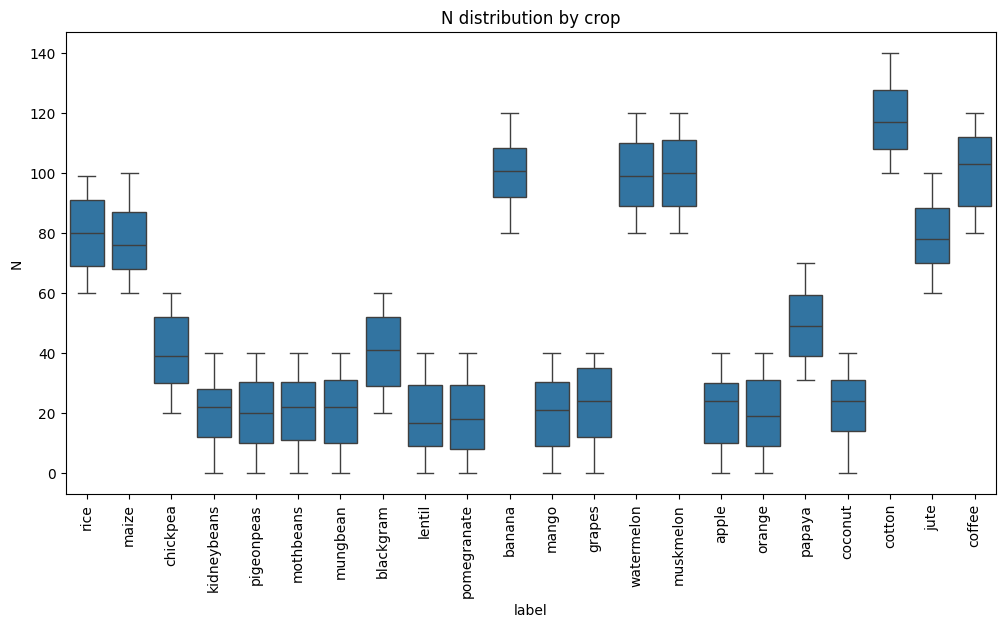

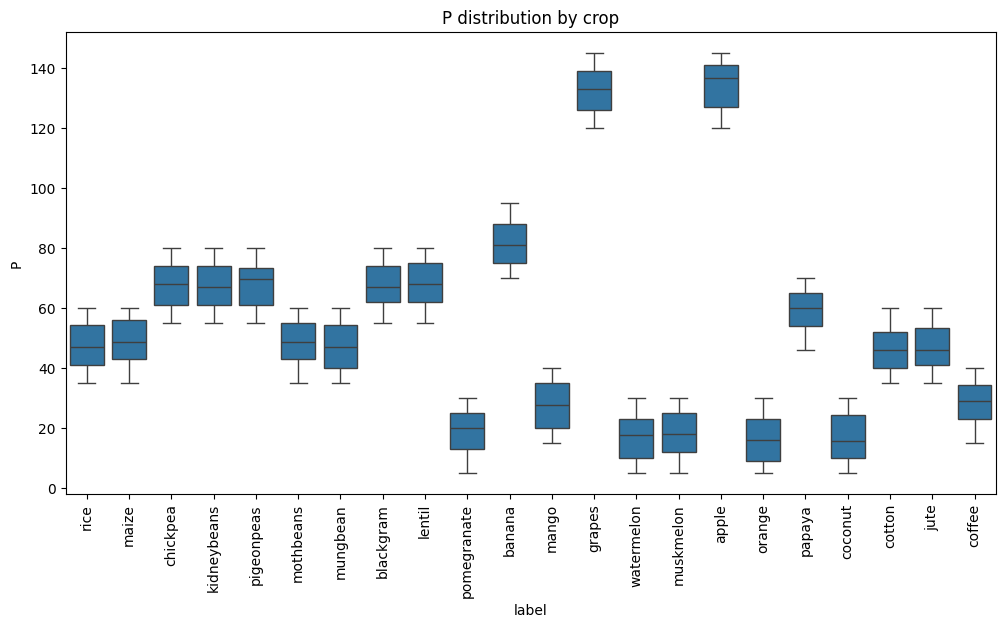

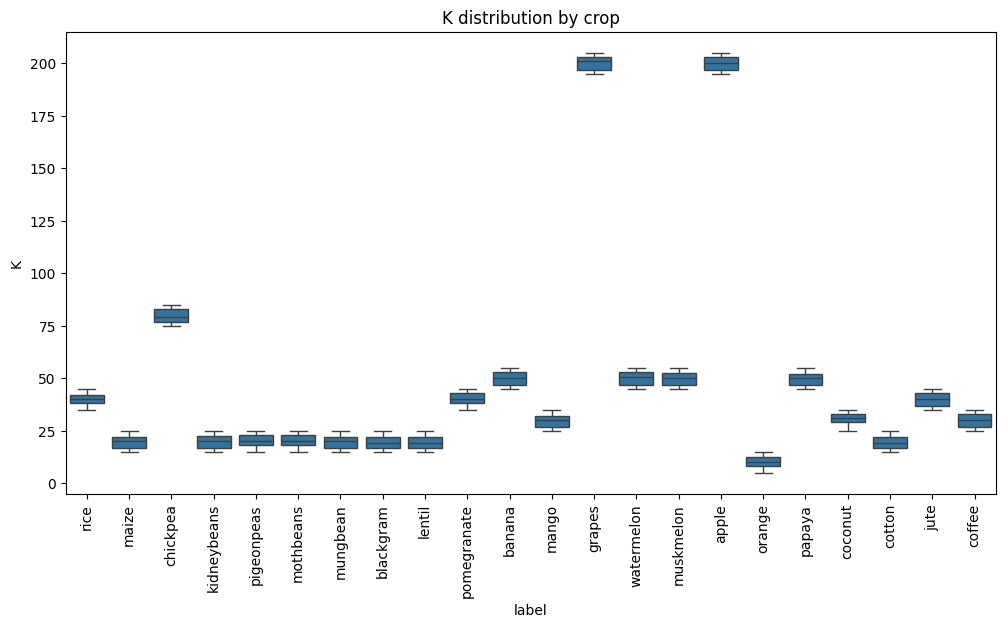

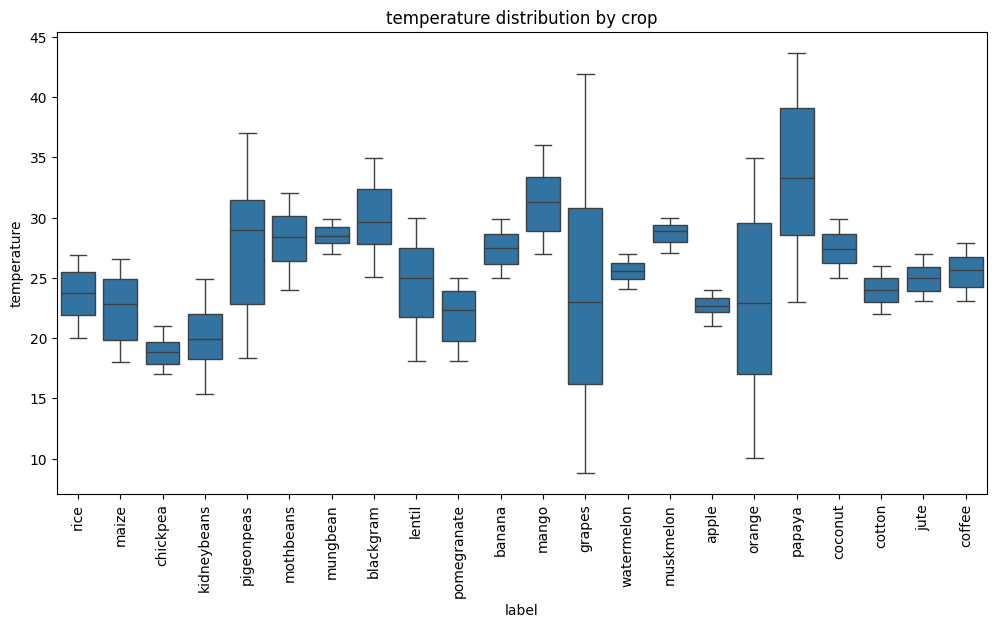

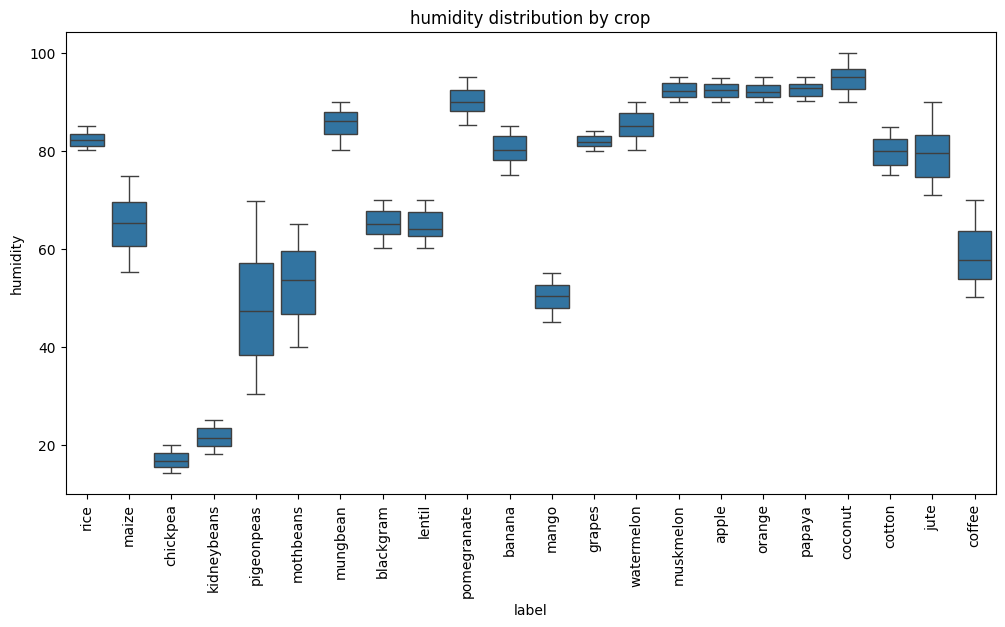

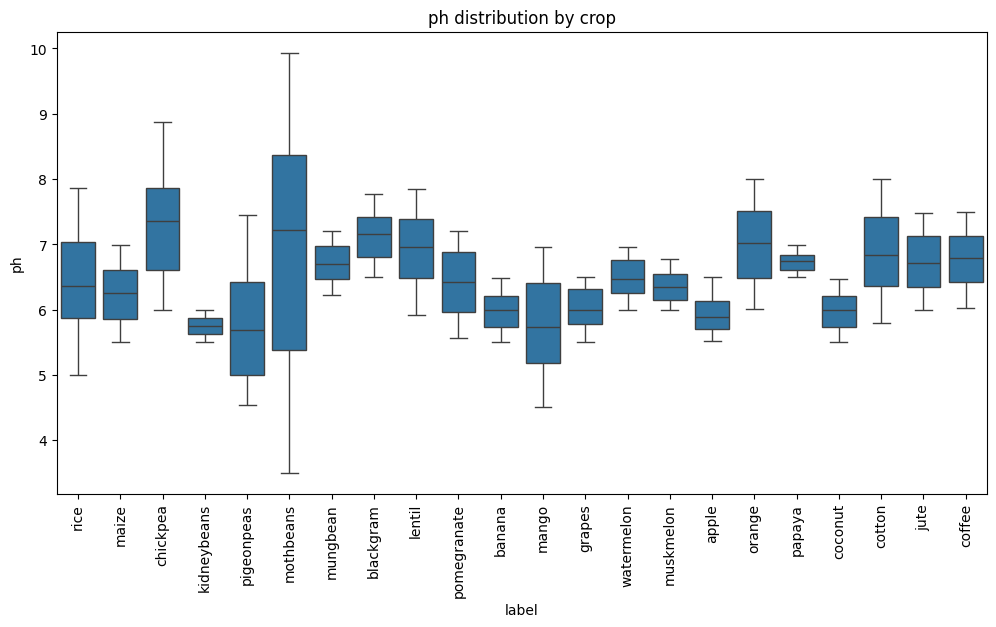

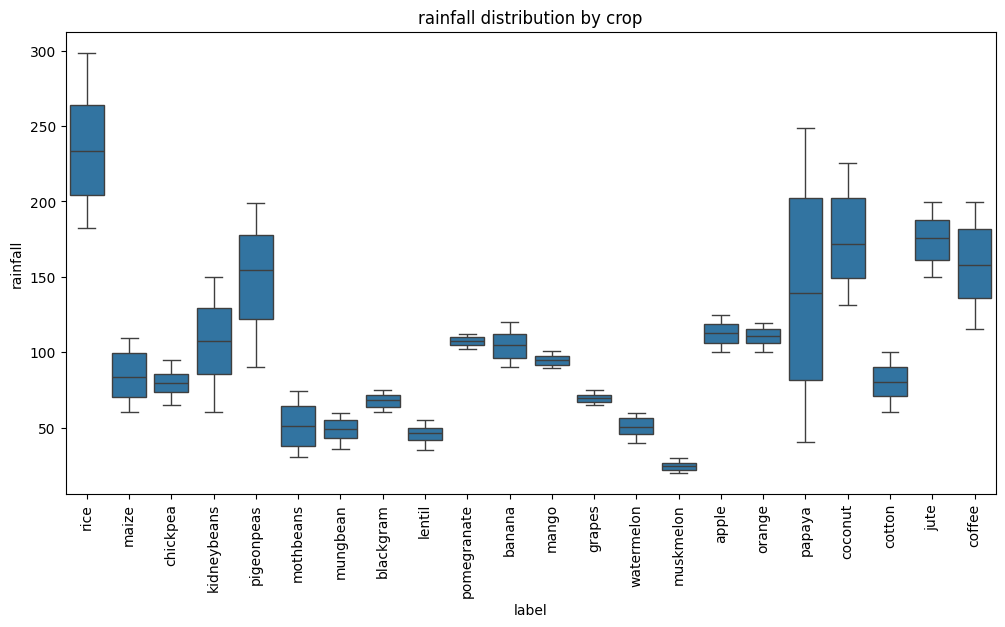

In [15]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=feature, data=data)
    plt.xticks(rotation=90)
    plt.title(f'{feature} distribution by crop')
    plt.show()


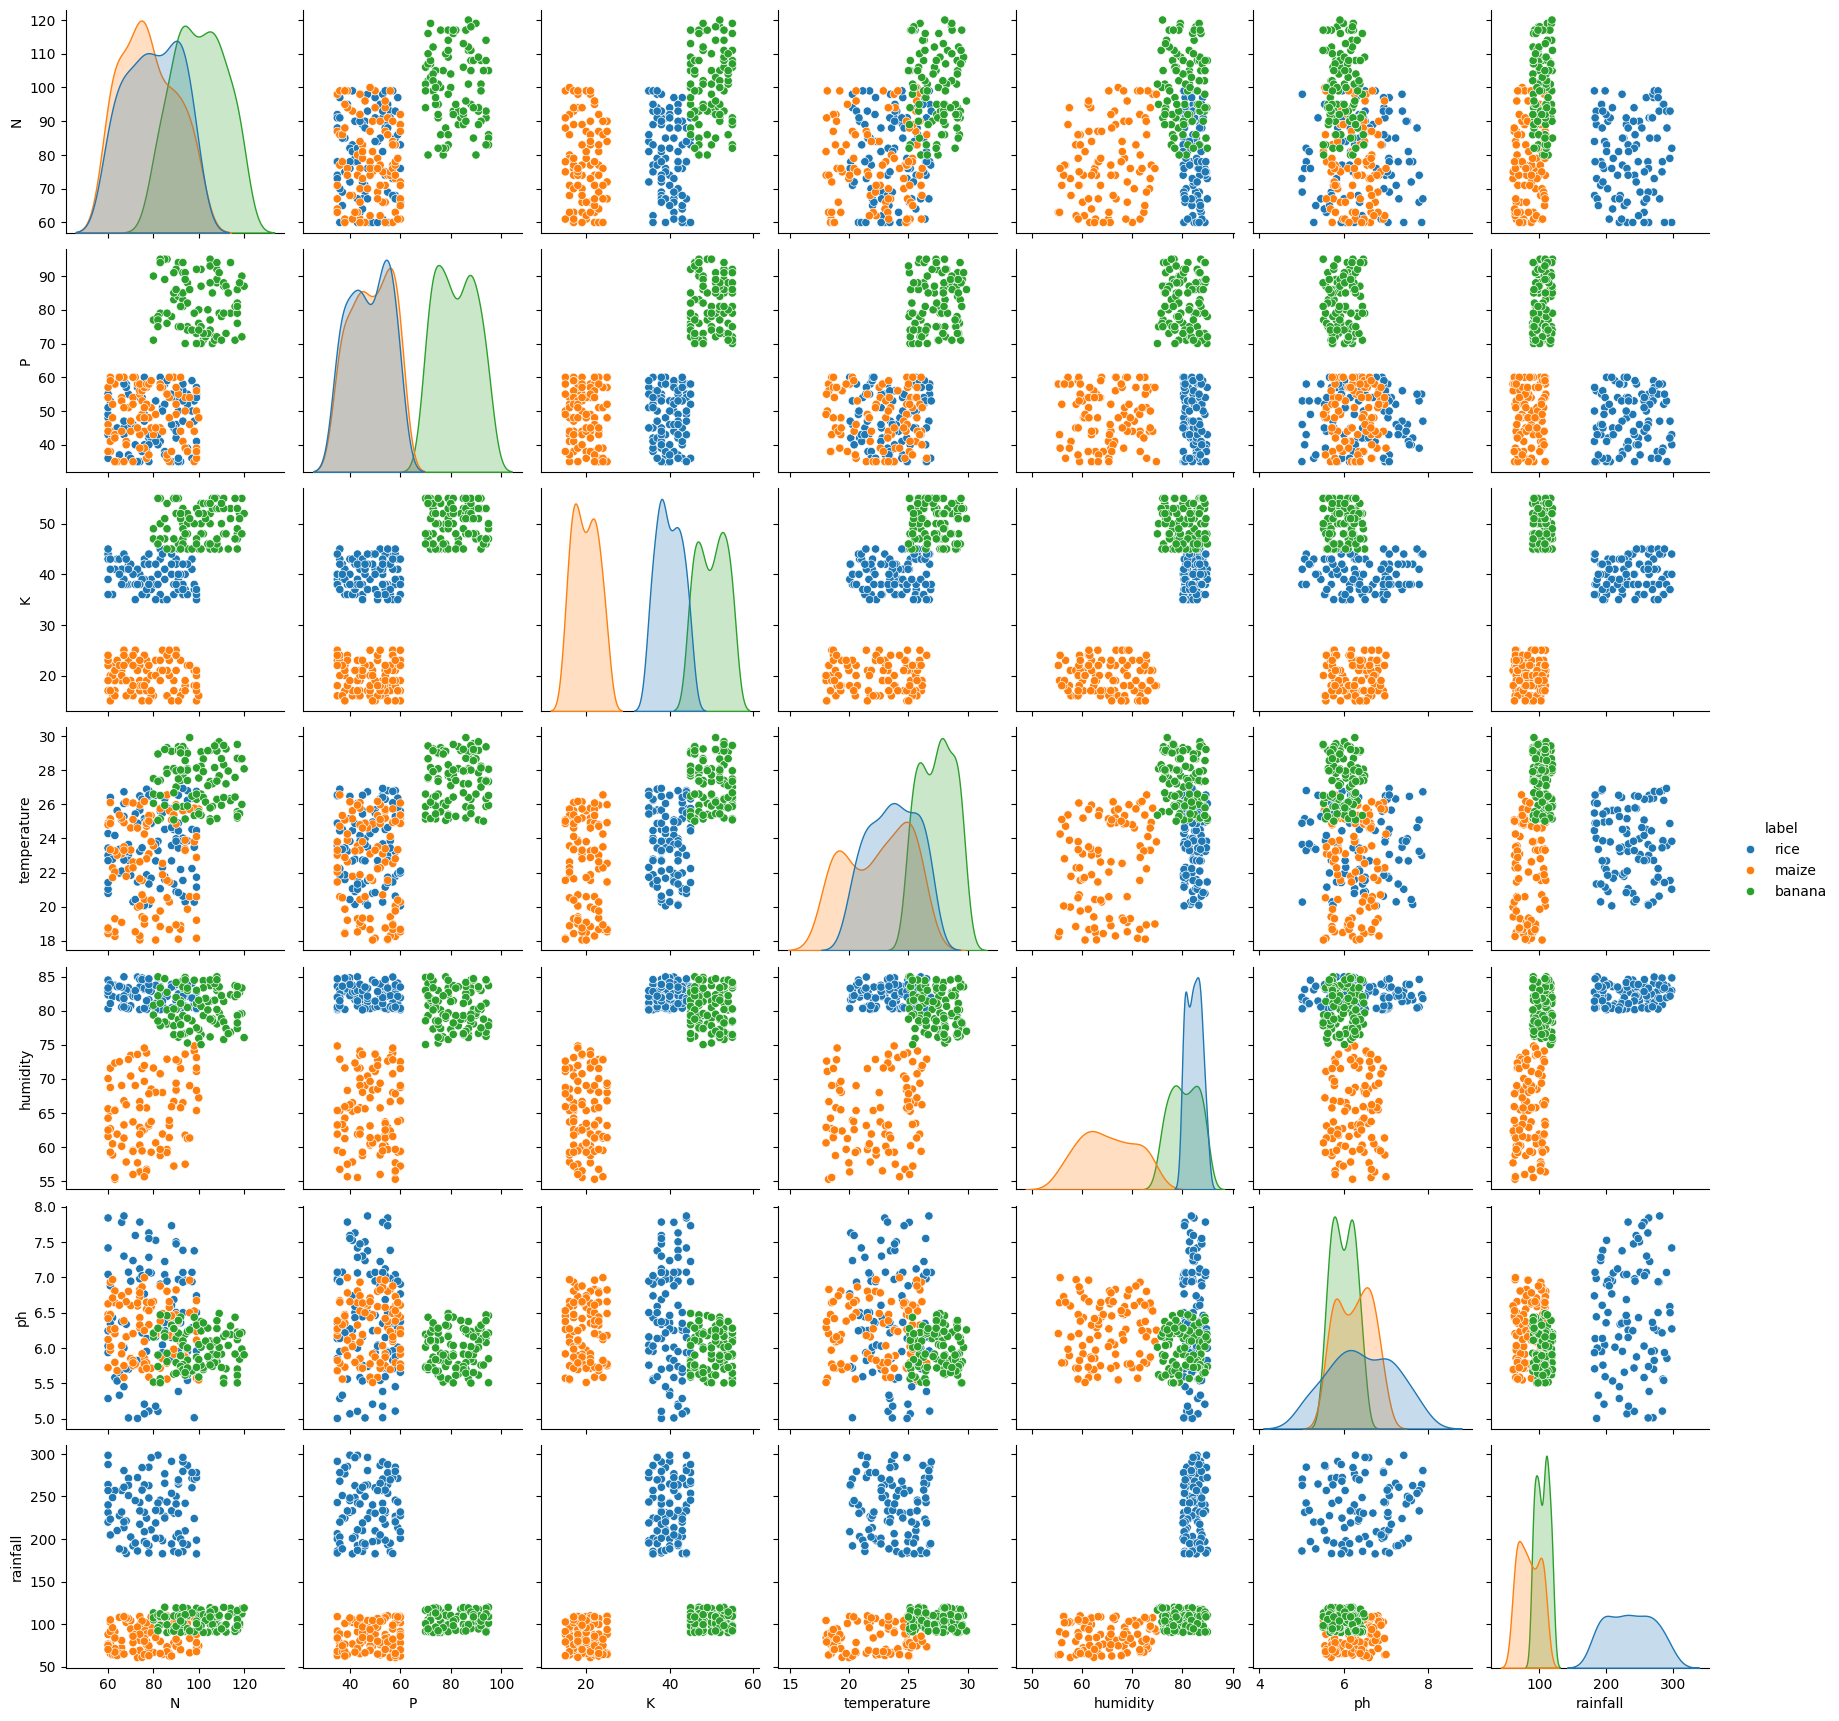

In [16]:
subset = data[data['label'].isin(['rice', 'maize', 'banana'])]
sns.pairplot(subset, hue='label')
plt.show()


## Encoding labels column

Labels are i object data type :
ill have to encode the target labels to numerical format
<!-- Encoding the target labels (crops) -->

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label_encoder'] = le.fit_transform(data['label'])


label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


## Split into Features and Target

set label column as the target variable

In [18]:
# Drop the original 'label' (crop name) and 'label_encoded' from features
# because 'label_encoded' is our target (y)
X = data.drop(['label', 'label_encoder'], axis=1)  # Features
y = data['label_encoder']  # Target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test, y_train,y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

Ill train my model using 80% and testing using 20% of the dataset

## Model  training.

Ill train the model using three algorithms and determine the best algorithm .
 *Random classifier
 *KNN
 *MLP (Multi layer processing) 

### Model Training using Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [23]:
y_pred_rf

array([16,  1,  6, 11, 16,  3, 20,  2,  1, 16, 21, 19, 21, 11, 13,  7,  7,
       12, 12,  0,  2,  0, 13,  9,  0,  8, 13, 21, 20,  5, 12,  8,  1,  5,
        8,  2,  7,  7,  2,  8,  4, 17, 12, 11, 10,  8,  6, 10,  3, 14, 17,
       19, 18, 21, 12,  2, 17, 17,  5, 10, 10, 13,  5,  1, 17, 20, 16,  4,
        2, 19,  1, 15, 21, 10,  1,  4, 13, 14, 14, 12,  5, 21, 15,  9, 12,
       19, 16,  6,  4, 17, 13, 14, 13,  6,  8,  7,  6,  3,  8, 21, 15, 19,
       16, 18, 18,  7,  9, 10, 20, 20,  0, 14, 14,  7, 20, 15,  2, 10,  1,
       16, 16,  3, 11, 12, 11, 10,  1, 19,  4, 14,  6,  3,  8, 14, 13, 11,
        0,  3, 20, 11,  6,  8, 19, 12, 20, 17,  1, 16, 18, 10, 11,  3,  6,
       21, 13, 11, 18, 15,  0, 14,  2,  3, 11, 11,  9,  5, 16, 11,  7, 19,
        0,  4, 15,  7,  6, 10, 18,  3, 11, 13,  0, 15,  6, 21, 15, 21, 16,
       21,  5,  9,  0,  3,  2,  5, 15,  5,  0,  7,  8, 17,  4,  7, 21, 14,
       19, 18, 14, 10, 17, 15,  3,  0, 11,  3,  1, 19, 19, 11, 16,  8,  6,
        6, 11,  7, 14, 10

In [24]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9954545454545455
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16  

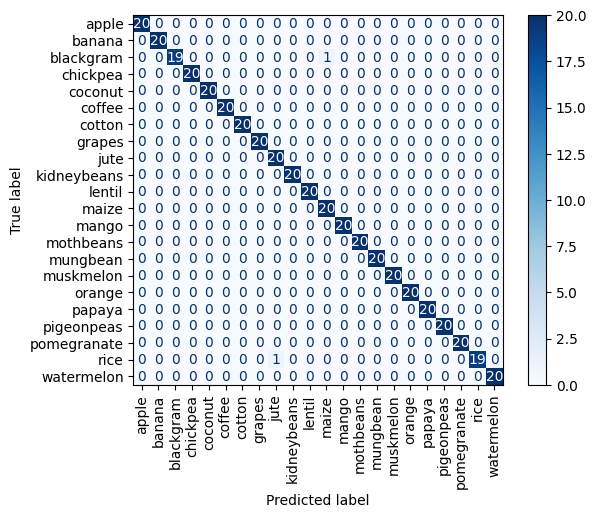

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

# Plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)

Of the three algorithms rhe Random classifier performed the best as its accuracy was 99 % . MLP performed npt as much as the random classifier with an accuracy of 90 %.
NOTE : i did hyperparameter tuning of the MLP , its accuracy ranged between 90% - 95%

Ill have to choose Random classifier algorithm . but first lets test it ....

## Model testing.
I tested the model using a dummy data to ascertain it can predict top 3 crop .

In [27]:
# 🔮 Get prediction probabilities for all test samples
probs = rf_model.predict_proba(X_test)

# 🔢 Get top 3 indices per row
top3_indices = np.argsort(probs, axis=1)[:, -3:][:, ::-1]  # shape: (n_samples, 3)

# 🔁 Convert top 3 indices to crop names row-by-row
top3_crops = []
for row in top3_indices:
    crop_names = le.inverse_transform(row)
    top3_crops.append(crop_names)

# 🎉 Show top 3 predictions and actual crop for first 5 samples
for i in range(5):
    print(f"Sample {i+1}: Top 3 predicted crops => {top3_crops[i]}")
    print(f"   Actual crop: {le.inverse_transform([y_test.iloc[i]])[0]}\n")


Sample 1: Top 3 predicted crops => ['orange' 'pomegranate' 'watermelon']
   Actual crop: orange

Sample 2: Top 3 predicted crops => ['banana' 'papaya' 'cotton']
   Actual crop: banana

Sample 3: Top 3 predicted crops => ['cotton' 'watermelon' 'rice']
   Actual crop: cotton

Sample 4: Top 3 predicted crops => ['maize' 'mothbeans' 'watermelon']
   Actual crop: maize

Sample 5: Top 3 predicted crops => ['orange' 'pomegranate' 'watermelon']
   Actual crop: orange



In [37]:
# 🌾 Sample user input — adjust based on your feature order
sample_input = np.array([[80, 45, 60, 6.5, 200, 60, 20]])  # Example values
# sample_input = scaler.transform(sample_input)  # Scale if needed
#sample_input = np.array([[80, 45, 60, 20, 80, 6.5, 200]])

# 🔮 Predict probabilities
sample_probs = rf_model.predict_proba(sample_input)

# 🎯 Get top 3 crops
top3_idx = np.argsort(sample_probs, axis=1)[:, -3:][:, ::-1][0]
top3_crops = le.inverse_transform(top3_idx)

print("Top 3 Recommended Crops:", top3_crops)


Top 3 Recommended Crops: ['muskmelon' 'papaya' 'watermelon']


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Model saving wth pkl extension
THe model is saved as crop_recommendation_model with an extension .pkl

In [33]:
# Saving the model
import joblib

joblib.dump(rf_model,'recommendation_model.pkl')
joblib.dump(le, 'recommendation_label_encoder.pkl')

print("Model successfully saved")
print("-------------------------")

Model successfully saved
-------------------------


In [ ]:
import joblib
import numpy as np

# Load model and label encoder
model = joblib.load('recommendation_model.pkl')
le = joblib.load('recommendation_label_encoder.pkl')

# Sample user input
#sample_input = np.array([[80, 45, 60, 20, 80, 6.5, 200]])
sample_input = np.array([[80, 45, 60, 6.5, 200, 60, 20]])

# Predict probabilities
probs = model.predict_proba(sample_input)
top3_idx = np.argsort(probs, axis=1)[:, -3:][:, ::-1][0]
top3_crops = le.inverse_transform(top3_idx)

print("Top 3 Recommended Crops:", top3_crops)
print({"Best recommended Crop": top3_crops[0]})


Top 3 Recommended Crops: ['banana' 'watermelon' 'rice']
{'Best recommended Crop': 'banana'}


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
